# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 590


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | novoishimskiy
Processing Record 2 of Set 1 | launceston
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | bethel
Processing Record 5 of Set 1 | mont-tremblant
Processing Record 6 of Set 1 | korla
Processing Record 7 of Set 1 | kuybyshev
Processing Record 8 of Set 1 | west island
Processing Record 9 of Set 1 | acarau
Processing Record 10 of Set 1 | namsos
Processing Record 11 of Set 1 | karratha
Processing Record 12 of Set 1 | adamstown
Processing Record 13 of Set 1 | landeck
Processing Record 14 of Set 1 | nar'yan-mar
Processing Record 15 of Set 1 | thompson
Processing Record 16 of Set 1 | coahuayana de hidalgo
Processing Record 17 of Set 1 | edinburgh of the seven seas
Processing Record 18 of Set 1 | tiksi
Processing Record 19 of Set 1 | neryungri
Processing Record 20 of Set 1 | grytviken
Processing Record 21 of Set 1 | alice springs
Processing Record 22 of Set 1 | 

Processing Record 42 of Set 4 | udachny
Processing Record 43 of Set 4 | arteche
Processing Record 44 of Set 4 | bantay
Processing Record 45 of Set 4 | casper
Processing Record 46 of Set 4 | port elizabeth
Processing Record 47 of Set 4 | vila franca do campo
Processing Record 48 of Set 4 | mount gambier
Processing Record 49 of Set 4 | puerto ayora
Processing Record 0 of Set 5 | al ghayzah
Processing Record 1 of Set 5 | san clemente del tuyu
Processing Record 2 of Set 5 | oranjemund
Processing Record 3 of Set 5 | mulbagal
Processing Record 4 of Set 5 | port victoria
Processing Record 5 of Set 5 | moyale
Processing Record 6 of Set 5 | tshabong
Processing Record 7 of Set 5 | ungsang-nodongjagu
Processing Record 8 of Set 5 | san antonio de pale
Processing Record 9 of Set 5 | lomma
Processing Record 10 of Set 5 | nemuro
Processing Record 11 of Set 5 | akureyri
Processing Record 12 of Set 5 | vallenar
Processing Record 13 of Set 5 | ashland
Processing Record 14 of Set 5 | aurora
Processing Re

Processing Record 34 of Set 8 | pindushi
Processing Record 35 of Set 8 | mata-utu
Processing Record 36 of Set 8 | saipan
Processing Record 37 of Set 8 | smirnovo
Processing Record 38 of Set 8 | carutapera
Processing Record 39 of Set 8 | slyudyanka
Processing Record 40 of Set 8 | tsagan aman
Processing Record 41 of Set 8 | tremonton
Processing Record 42 of Set 8 | massa lubrense
Processing Record 43 of Set 8 | annandale
Processing Record 44 of Set 8 | lerwick
Processing Record 45 of Set 8 | morristown
Processing Record 46 of Set 8 | papao
Processing Record 47 of Set 8 | qapqal
City not found. Skipping...
Processing Record 48 of Set 8 | maun
Processing Record 49 of Set 8 | borba
Processing Record 0 of Set 9 | mili
Processing Record 1 of Set 9 | darnah
Processing Record 2 of Set 9 | murun-kuren
Processing Record 3 of Set 9 | lunen
Processing Record 4 of Set 9 | grand falls-windsor
Processing Record 5 of Set 9 | santana do livramento
Processing Record 6 of Set 9 | cidreira
Processing Recor

City not found. Skipping...
Processing Record 22 of Set 12 | hailin
Processing Record 23 of Set 12 | vadso
Processing Record 24 of Set 12 | koumra
Processing Record 25 of Set 12 | conceicao da barra
Processing Record 26 of Set 12 | saint-louis
Processing Record 27 of Set 12 | alo
Processing Record 28 of Set 12 | kuta
Processing Record 29 of Set 12 | revda
Processing Record 30 of Set 12 | gebeit
Processing Record 31 of Set 12 | sukumo
Processing Record 32 of Set 12 | floro
Processing Record 33 of Set 12 | voznesenskaya
Processing Record 34 of Set 12 | saint-pierre
Processing Record 35 of Set 12 | saint-philippe
Processing Record 36 of Set 12 | kassala
Processing Record 37 of Set 12 | portland
Processing Record 38 of Set 12 | howard springs
Processing Record 39 of Set 12 | n'dalatando
-----------------------------
Data Retrieval Complete      
-----------------------------


In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          566
Lat           566
Lng           566
Max Temp      566
Humidity      566
Cloudiness    566
Wind Speed    566
Country       566
Date          566
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,novoishimskiy,53.1981,66.7694,18.01,87,88,2.53,KZ,1717634227
1,launceston,-41.4500,147.1667,11.75,81,100,3.09,AU,1717634227
2,port-aux-francais,-49.3500,70.2167,1.92,73,14,19.20,TF,1717634113
3,bethel,41.3712,-73.4140,23.47,81,40,2.06,US,1717633960
4,mont-tremblant,46.1949,-74.6264,23.77,64,65,0.51,CA,1717633782


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,novoishimskiy,53.1981,66.7694,18.01,87,88,2.53,KZ,1717634227
1,launceston,-41.4500,147.1667,11.75,81,100,3.09,AU,1717634227
2,port-aux-francais,-49.3500,70.2167,1.92,73,14,19.20,TF,1717634113
3,bethel,41.3712,-73.4140,23.47,81,40,2.06,US,1717633960
4,mont-tremblant,46.1949,-74.6264,23.77,64,65,0.51,CA,1717633782


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

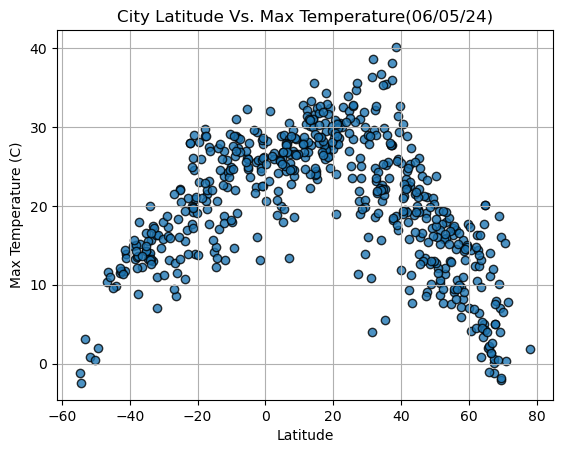

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Max Temperature(%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/citylat_maxtemp.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

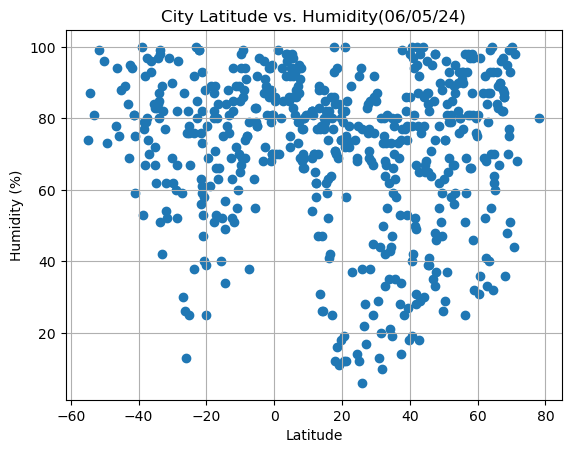

In [9]:
# Build scatter plot for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity(%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/citylat_humidity.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

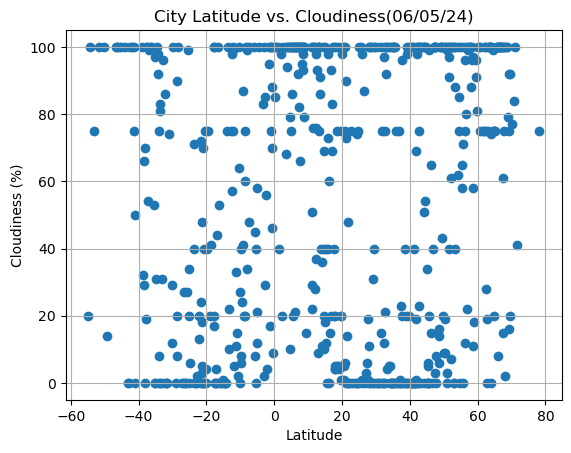

In [10]:
# Build scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness(%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/citylat_cloudi.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

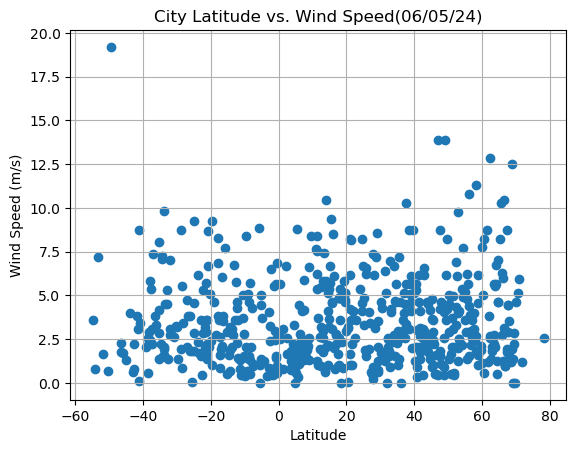

In [11]:
# Build scatter plot for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed(%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
def plot_linear_regression(x_values, y_values, x_label, y_label, title, save_path):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    
    # Create the scatter plot
    plt.scatter(x_values, y_values, marker="o", label="Cities")
    
    # Plot the regression line
    regression_line = slope * x_values + intercept
    plt.plot(x_values, regression_line, color="red", label=f"y = {slope:.2f}x + {intercept:.2f}")    

    # Incorporate the other graph properties
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend()
    plt.grid(True)
    print(f"The r-value is: {r_value**2:.2f}")
    
    # Save the figure
    plt.savefig(save_path)
    
    # Show plot
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,novoishimskiy,53.1981,66.7694,18.01,87,88,2.53,KZ,1717634227
3,bethel,41.3712,-73.4140,23.47,81,40,2.06,US,1717633960
4,mont-tremblant,46.1949,-74.6264,23.77,64,65,0.51,CA,1717633782
5,korla,41.7597,86.1469,22.70,31,1,1.74,CN,1717634228
6,kuybyshev,55.4475,78.3218,16.37,91,58,4.77,RU,1717633991


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,launceston,-41.4500,147.1667,11.75,81,100,3.09,AU,1717634227
2,port-aux-francais,-49.3500,70.2167,1.92,73,14,19.20,TF,1717634113
7,west island,-12.1568,96.8225,26.99,94,75,4.63,CC,1717634228
8,acarau,-2.8856,-40.1200,25.63,87,2,4.06,BR,1717634059
10,karratha,-20.7377,116.8463,20.91,40,0,8.66,AU,1717634228


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.56


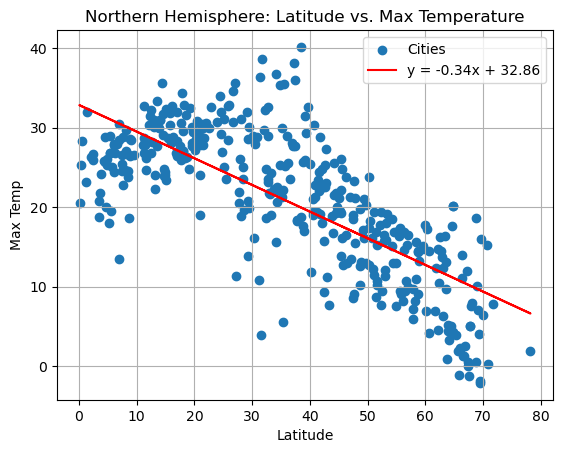

In [15]:
# Linear regression on Northern Hemisphere: Max Temperature vs. Latitude
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Max Temp"]
plot_linear_regression(x_values,  y_values, 
                       "Latitude", "Max Temp", 
                       "Northern Hemisphere: Latitude vs. Max Temperature", 
                       "output_data/NH_Lat_vs_MaxTemp.png")

The r-value is: 0.62


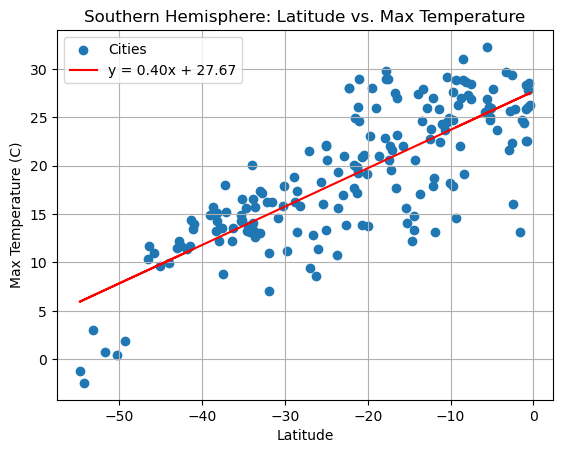

In [16]:
# Linear regression on Southern Hemisphere: Max Temperature vs. Latitude
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], 
                       "Latitude", "Max Temperature (C)", 
                       "Southern Hemisphere: Latitude vs. Max Temperature", 
                       "output_data/SH_Lat_vs_MaxTemp.png")

**Discussion about the linear relationship:**

Both hemispheres decrease in temperature as distance increases from the equator. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.00


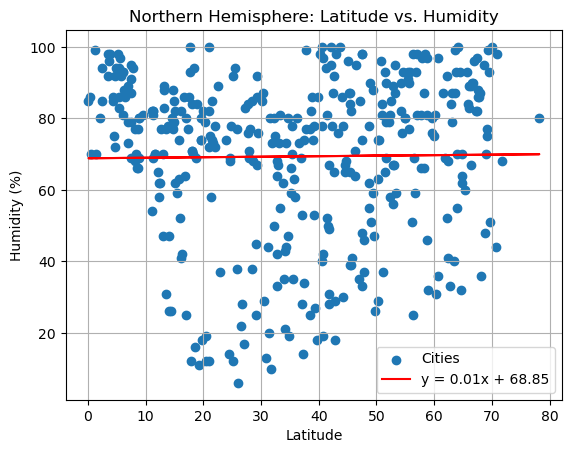

In [17]:
# Linear regression on Northern Hemisphere: Humidity vs. Latitude
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], 
                       "Latitude", "Humidity (%)", 
                       "Northern Hemisphere: Latitude vs. Humidity", 
                       "output_data/NH_Lat_vs_Humidity.png")

The r-value is: 0.00


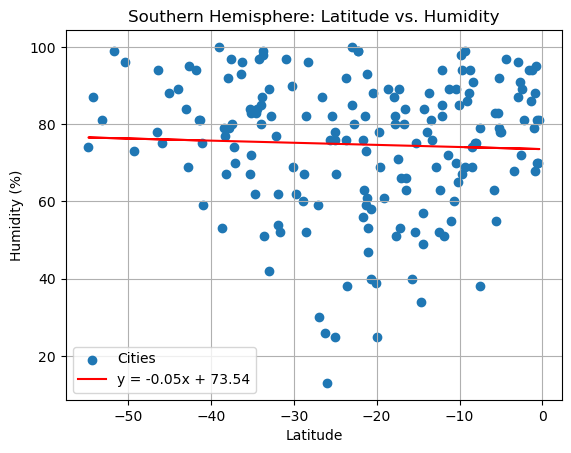

In [18]:
# Linear regression on Southern Hemisphere: Humidity vs. Latitude
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], 
                       "Latitude", "Humidity (%)", 
                       "Southern Hemisphere: Latitude vs. Humidity", 
                       "output_data/SH_Lat_vs_Humidity.png")

**Discussion about the linear relationship:** No clear indicator for pattern of correlation between latitude and humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.00


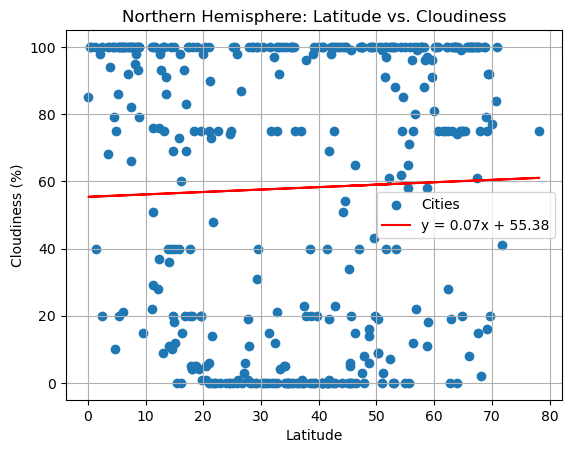

In [19]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], 
                       "Latitude", "Cloudiness (%)", 
                       "Northern Hemisphere: Latitude vs. Cloudiness", 
                       "output_data/NH_Lat_vs_Cloudiness.png")

The r-value is: 0.01


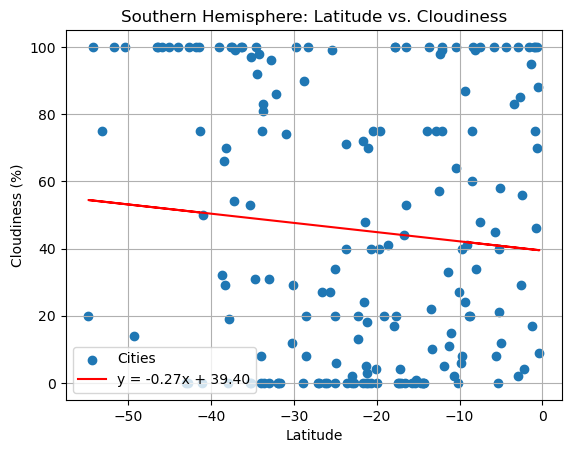

In [20]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], 
                       "Latitude", "Cloudiness (%)", 
                       "Southern Hemisphere: Latitude vs. Cloudiness", 
                       "output_data/SH_Lat_vs_Cloudiness.png")

**Discussion about the linear relationship:** Very little correlation between latitude and cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.01


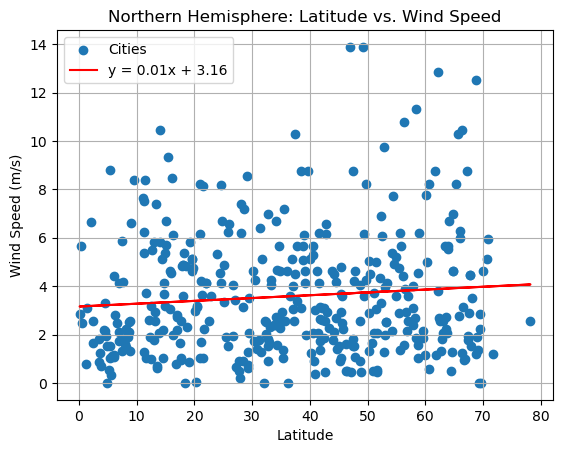

In [21]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], 
                       "Latitude", "Wind Speed (m/s)", 
                       "Northern Hemisphere: Latitude vs. Wind Speed", 
                       "output_data/NH_Lat_vs_WindSpeed.png")

The r-value is: 0.02


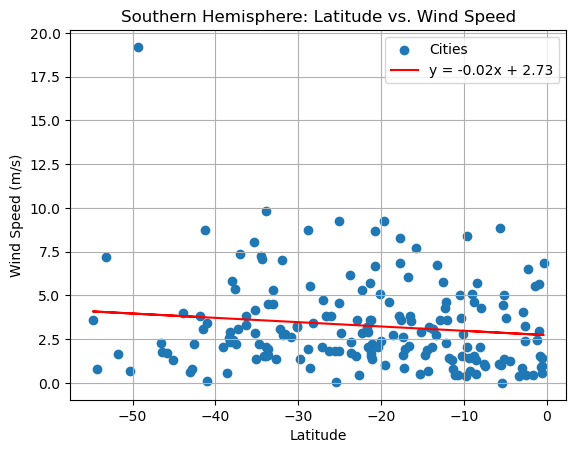

In [22]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], 
                       "Latitude", "Wind Speed (m/s)", 
                       "Southern Hemisphere: Latitude vs. Wind Speed", 
                       "output_data/SH_Lat_vs_WindSpeed.png")

**Discussion about the linear relationship:** Very little coorelation between latitiude and wind speed.